In [2]:
import sys
print(sys.executable)
print(sys.prefix)
print(sys.version)
print(sys.path)

c:\Users\hp\anaconda3\envs\visa\python.exe
c:\Users\hp\anaconda3\envs\visa
3.8.19 (default, Mar 20 2024, 19:55:45) [MSC v.1916 64 bit (AMD64)]
['c:\\Users\\hp\\anaconda3\\envs\\visa\\python38.zip', 'c:\\Users\\hp\\anaconda3\\envs\\visa\\DLLs', 'c:\\Users\\hp\\anaconda3\\envs\\visa\\lib', 'c:\\Users\\hp\\anaconda3\\envs\\visa', '', 'c:\\Users\\hp\\anaconda3\\envs\\visa\\lib\\site-packages', 'f:\\mlops-production-ready-machine-learning-project', 'c:\\Users\\hp\\anaconda3\\envs\\visa\\lib\\site-packages\\win32', 'c:\\Users\\hp\\anaconda3\\envs\\visa\\lib\\site-packages\\win32\\lib', 'c:\\Users\\hp\\anaconda3\\envs\\visa\\lib\\site-packages\\Pythonwin']


# US VISA Approval Prediction Project

## About
The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

### 1) Problem statement.
- OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
- As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

__In this project we are going to use the data given to build a Classification model:__

- This model is to check if Visa get approved or not based on the given dataset.
- This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

### 2) Data Collection.
- The Dataset is part of Office of Foreign Labor Certification (OFLC)
- The data consists of 25480 Rows and 12 Columns
- https://www.kaggle.com/datasets/moro23/easyvisa-dataset

### Features Description
    - case_id: ID of each visa application
    - continent: Information of continent the employee
    - education_of_employee: Information of education of the employee
    - has_job_experience: Does the employee has any job experience? Y= Yes; N = No
    - requires_job_training: Does the employee require any job training? Y = Yes; N = No
    - no_of_employees: Number of employees in the employer's company
    - yr_of_estab: Year in which the employer's company was established
    - region_of_employment: Information of foreign worker's intended region of employment in the US.
    - prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
    - unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
    - full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
    - case_status: Flag indicating if the Visa was certified or denied


### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#import the CSV File
df = pd.read_csv(r'EasyVisa.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Shape of the dataset

In [3]:
df.shape

(25480, 12)

### Info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Statistical Summary of the dataset

In [5]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


### 3) EXPLORING DATA

In [16]:
#define numerical & Categorical columns
numeric_features = [i for i in df.columns if df[i].dtype != "O"]
categorical_features = [i for i in df.columns if df[i].dtype == "O"]


print("We have {} numerical features : {}".format(len(numeric_features), numeric_features))
print("We have {} categorical features : {}".format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [8]:
#proportion of count in categorical_features

for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print("--------"*10)

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-----------------

__Insights__

- `case_id` have unique values for each rows which is not important, it has to be dropped.
- `continent` column is highly biased towards asia. we can combine other subcategories to form single category
- `unit_of_wage` column seems to be important column its based on yearly contract


### Checking Skewness of Numerical Features

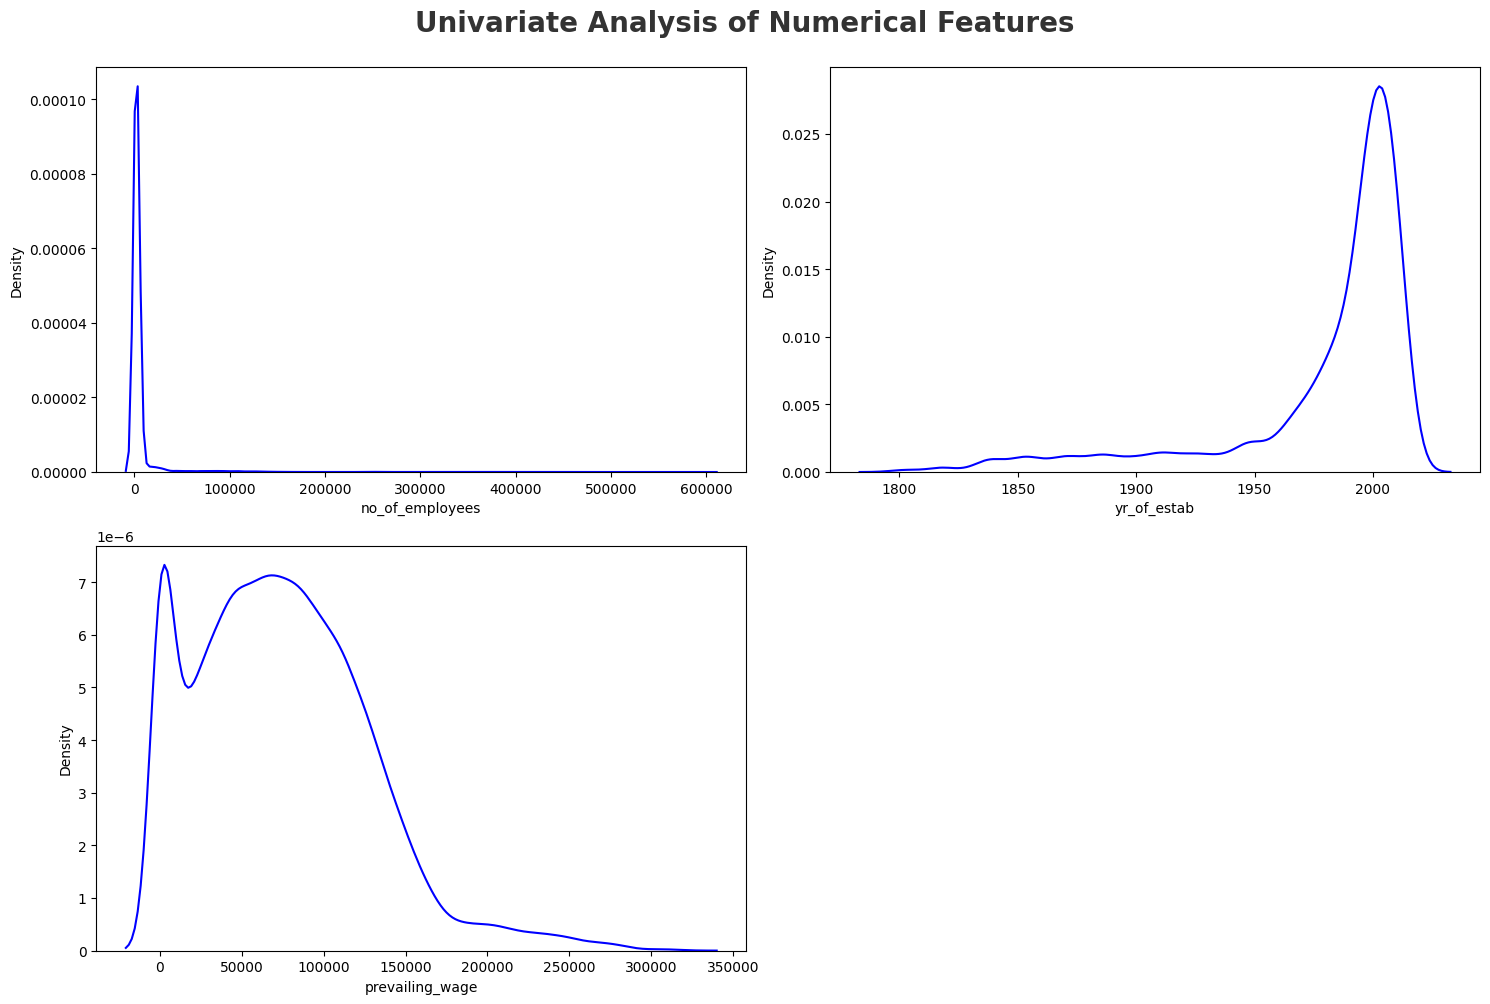

In [11]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

__Insights__

- `no_of_employees` is highly skewed beacuse of outliers
- `yr_of_estab` is a descrete feature
- `prevailing_wage` is right skewed distribution

### Exploring Categorical Features

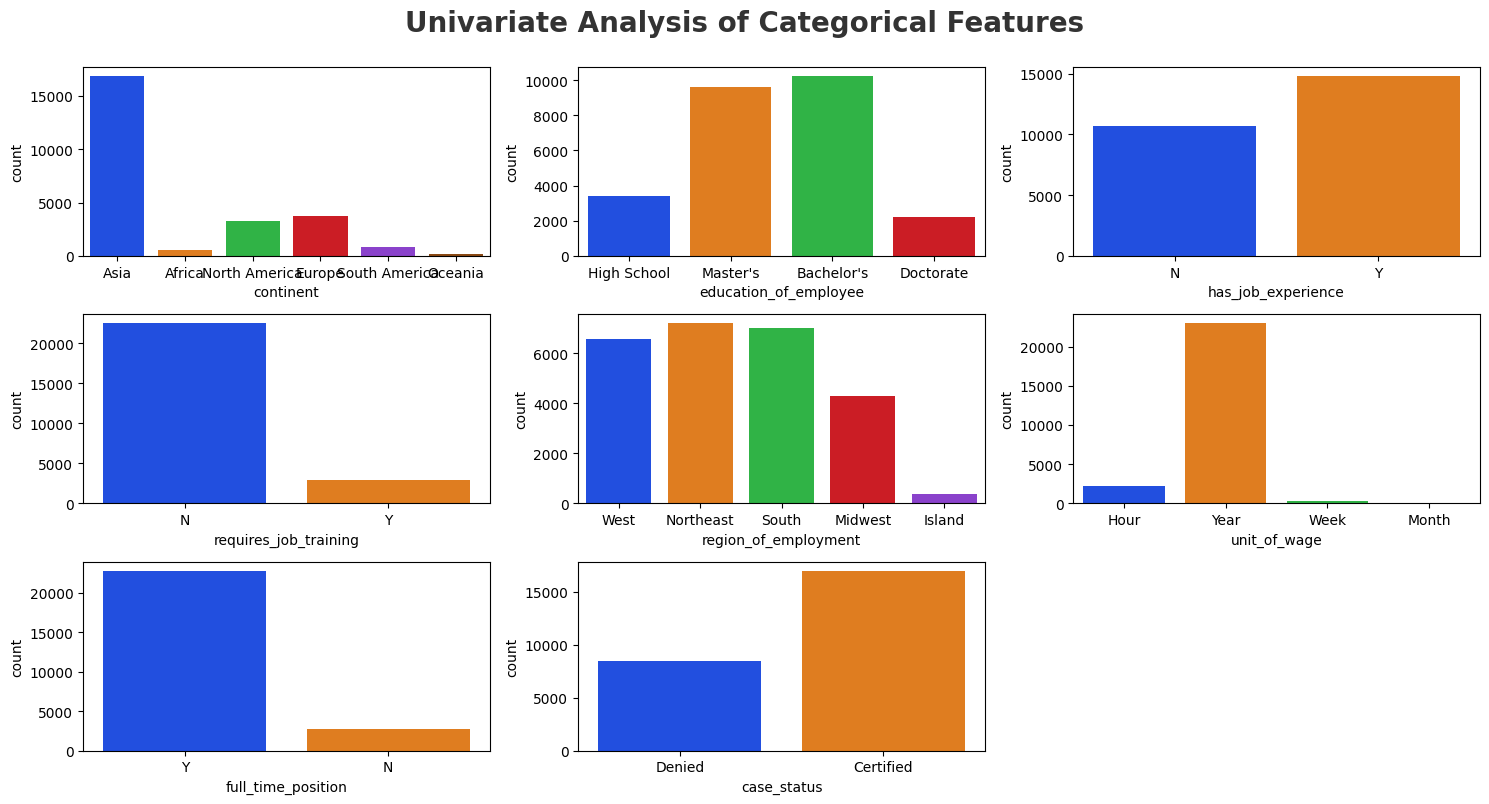

In [17]:
categorical_features.remove('case_id')
plt.figure(figsize=(15,8))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20,fontweight='bold',alpha=0.8,y=1.0)


for i in range(0 , len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]],palette='bright')
    plt.xlabel(categorical_features[i])
    plt.tight_layout();

__Insights__

- `continent` , `requires_job_training` ,`full_time_position` and `unit_of_wage` have one single subcategory dominating other subcategories.
- In __Other Features__ all are balanced in categories.(sort off)

### Multivariate Analysis

In [19]:
discrete_features = [i for i in numeric_features if len(df[i].unique()) <= 25]
continuous_features = [i for i in numeric_features if len(df[i].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))




We have 0 discrete features : []

We have 3 continuous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


### Checking Multicollinearity in Numerical Features

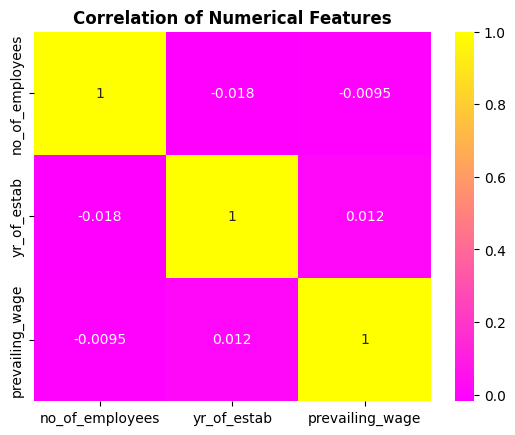

In [22]:
corr = df[numeric_features].corr()
sns.heatmap(corr,annot=True,cmap='spring')
plt.title("Correlation of Numerical Features", fontweight='bold')
plt.show()

__Insights__

- numeric features are not correlated, Hence there is no multicollinearity in numeric Features.

### Checking Multicollinearity in Categorical features

- __A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test__

- __A chi-square statistic is one way to show a relationship between two categorical variables.__

- __Here we test correlation of Categorical columns with Target column i.e case_status__

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [25]:
from scipy.stats import chi2_contingency

'''create empty list'''
chi2_test = []

'''run repetative loop'''
for feature in categorical_features:
    '''using chi2_contingency method along with crosstab function'''
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")

    else:
        chi2_test.append("Fail to Reject Null Hypothesis")

'''Converting results into dataframe'''
result = pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns = ['column','Hypothesis result']
result

,column,Hypothesis result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


__Report__

- `requires_job_training` is fail to reject null hypothesis , it means it doesn't correlate with target column.

### Checking distribution of numerical columns by case status

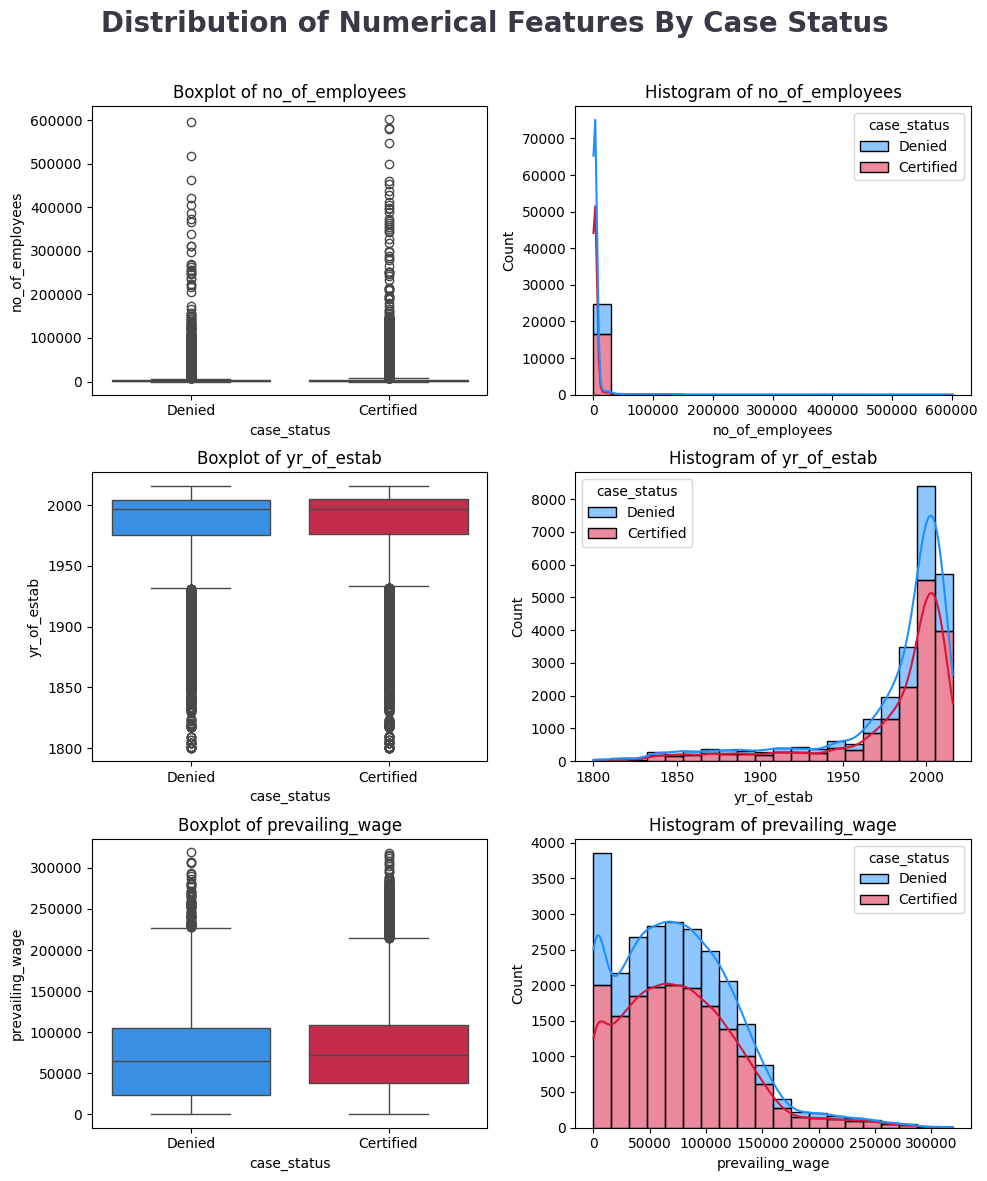

In [28]:
clr1 = ['#1E90FF', '#DC143C']
fig , ax = plt.subplots(3,2,figsize=(10,12))

plt.suptitle("Distribution of Numerical Features By Case Status",fontsize=20,fontweight='bold',
             ha='center' , color='#3C3744')


continuous_feat = [i for i in numeric_features if len(df[i].unique()) > 10]


for i , col in enumerate(continuous_feat):
    
    sns.boxplot(data=df, x='case_status',y=col,palette=clr1,ax=ax[i,0])
    ax[i,0].set_title(f"Boxplot of {col}",fontsize=12)
    
    sns.histplot(data=df,x=col,hue='case_status',bins=20,kde=True,
                 multiple='stack',palette=clr1,ax=ax[i,1])
    ax[i,1].set_title(f"Histogram of {col}",fontsize=12)


fig.tight_layout()
fig.subplots_adjust(top=0.90)



__Initial Analysis Report__

- `no_of_employess` column has many outliers which we hanlde it in feature engineering and it is __right skewed__.
- `yr_of_estab ` is left skewed and some outliers is there in lower bound.